In [13]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Housing.csv")
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [3]:
price = data['price'].values.reshape(-1,1)

In [18]:
facility_data = data.iloc[:, 1:].to_numpy()
facility_data = np.where(facility_data == 'yes', 1, facility_data)
facility_data = np.where(facility_data == 'no', 0, facility_data)
facility_data = np.where(facility_data == 'furnished', 2, facility_data)
facility_data = np.where(facility_data == 'semi-furnished', 1, facility_data)
facility_data = np.where(facility_data == 'unfurnished', 0, facility_data)

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(facility_data, price, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
iters = 1000
rate = 0.09

In [21]:
model = MLPRegressor(hidden_layer_sizes=(512,),max_iter=iters,learning_rate_init=rate,activation='relu',solver='adam',verbose=True,batch_size=32)
history = model.fit(X_train,y_train)
print(len(history.loss_curve_))

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 12909518078209.49804688
Iteration 2, loss = 12896185773859.78906250
Iteration 3, loss = 12862581846192.66992188
Iteration 4, loss = 12800573067595.00781250
Iteration 5, loss = 12704713210746.63867188
Iteration 6, loss = 12570287699637.46289062
Iteration 7, loss = 12404244422428.96093750
Iteration 8, loss = 12196470009202.55859375
Iteration 9, loss = 11945728431771.09179688
Iteration 10, loss = 11669370662781.92578125
Iteration 11, loss = 11362186715247.85351562
Iteration 12, loss = 11015528567864.31445312
Iteration 13, loss = 10645396858717.26562500
Iteration 14, loss = 10259769449600.29882812
Iteration 15, loss = 9853425696012.18164062
Iteration 16, loss = 9439261082821.93359375
Iteration 17, loss = 9018964774674.80859375
Iteration 18, loss = 8579543087005.77050781
Iteration 19, loss = 8149461393343.62109375
Iteration 20, loss = 7723328650597.82519531
Iteration 21, loss = 7321666734496.26367188
Iteration 22, loss = 6905720566684.93847656
Iteration 23, loss = 652156

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


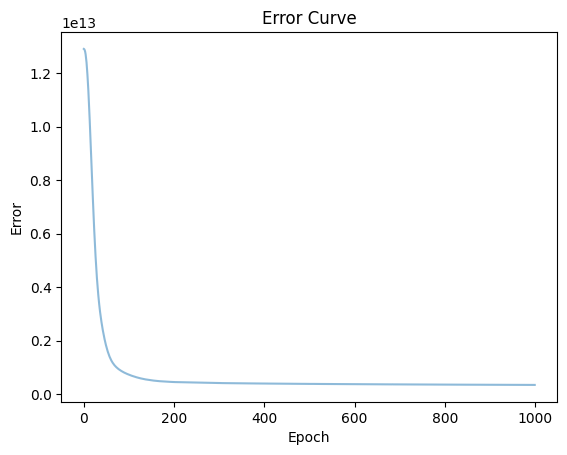

In [22]:
import matplotlib.pyplot as plt
#plt.scatter(range(1,iters+1), history.loss_curve_, alpha=0.5)
plt.plot(history.loss_curve_, alpha=0.5)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Curve')
plt.show()

In [29]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return np.mean((y - y_pred) ** 2)

mse_val = evaluate_model(model, X_val, y_val)
mse_test = evaluate_model(model, X_test, y_test)

print(f'Validation MSE: {mse_val**0.5:.4f}')
print(f'Test MSE: {mse_test**0.5:.4f}')

Validation MSE: 3935134033.6380
Test MSE: 2678685.2817


In [28]:
mse_train = evaluate_model(model, X_train, y_train)
print(f'Training MSE: {mse_train**0.5:.4f}')

Training MSE: 2333353.3939


In [26]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
print(y_test)
print(y_test_pred)

[[ 2408000]
 [ 1750000]
 [ 5810000]
 [ 1750000]
 [ 5950000]
 [ 2520000]
 [ 4235000]
 [ 2450000]
 [ 8890000]
 [ 3255000]
 [ 2870000]
 [ 8190000]
 [ 2660000]
 [ 6685000]
 [ 4193000]
 [ 6790000]
 [ 5250000]
 [ 3773000]
 [ 4403000]
 [ 2660000]
 [ 6650000]
 [ 2940000]
 [ 3360000]
 [ 3353000]
 [ 3500000]
 [ 4795000]
 [ 6230000]
 [ 9800000]
 [ 3500000]
 [ 3360000]
 [ 4200000]
 [ 6860000]
 [ 3850000]
 [ 1890000]
 [ 3710000]
 [ 6440000]
 [ 4480000]
 [ 6650000]
 [ 6650000]
 [ 4270000]
 [ 3080000]
 [ 3570000]
 [ 2520000]
 [ 5145000]
 [ 5950000]
 [ 4900000]
 [ 6195000]
 [ 1890000]
 [ 5250000]
 [ 5110000]
 [ 5740000]
 [ 2660000]
 [ 6510000]
 [ 2660000]
 [ 5250000]
 [ 5110000]
 [ 4690000]
 [ 4620000]
 [ 3500000]
 [ 3675000]
 [ 2800000]
 [ 3675000]
 [ 6650000]
 [ 3087000]
 [ 7525000]
 [ 4550000]
 [10150000]
 [ 5810000]
 [ 3920000]
 [ 4060000]
 [ 3640000]
 [ 3640000]
 [ 4550000]
 [ 3150000]
 [ 8855000]
 [ 9800000]
 [ 5495000]
 [ 4620000]
 [12250000]
 [ 5250000]
 [ 3703000]
 [ 4165000]]
[ 2893439.48056